# 4. Статистический анализ данных

### 1. Среднее значение,  медиана, мода и диапазон

### 1.1

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ekb_weather.csv')

print(df.head(10))
print(df.describe())

               date  temp  pressure  humidity
0  31.12.2019 23:00  -9.2     743.1        76
1  31.12.2019 20:00  -8.8     744.1        75
2  31.12.2019 17:00  -7.9     744.5        82
3  31.12.2019 14:00 -11.5     745.9        85
4  31.12.2019 11:00 -12.8     749.0        84
5  31.12.2019 08:00 -15.3     752.8        83
6  31.12.2019 05:00 -18.4     757.6        80
7  31.12.2019 02:00 -20.9     761.5        79
8  30.12.2019 23:00 -21.4     764.2        78
9  30.12.2019 20:00 -20.9     766.8        79
              temp     pressure     humidity
count  2919.000000  2918.000000  2919.000000
mean      3.953923   761.434133    66.257965
std      11.908801     8.133222    17.755583
min     -31.800000   735.000000    13.000000
25%      -5.200000   756.100000    55.000000
50%       3.900000   761.200000    72.000000
75%      13.500000   766.900000    80.000000
max      33.600000   787.600000    93.000000


### 1.2

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ekb_weather.csv')
df['date'] = pd.to_datetime(df['date'])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2919 non-null   datetime64[ns]
 1   temp      2919 non-null   float64       
 2   pressure  2918 non-null   float64       
 3   humidity  2919 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 91.3 KB
None


### 1.3 

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('ekb_weather.csv')
months = {1:'Январь', 2:'Февраль', 3:'Март', 4:'Апрель', 5:'Май', 6:'Июнь', 7:'Июль', 8:'Август', 9:'Сентябрь', 10:'Октябрь', 11:'Ноябрь', 12:'Декабрь'}

df['date'] = pd.to_datetime(df['date'])
df['month'] = pd.DatetimeIndex(df['date']).month

#Использование собственной функции
df['month'] = df['month'].apply(lambda i: months[i])

df.to_csv('new_ekb_weather.csv')

print(df)


#Использование встроенных методов
#df['date'] = pd.to_datetime(df['date'])
#df['month'] = df['date'].dt.month
#df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name()
#print(df)

#df['date'] = pd.to_datetime(df['date'])
#df["month"] = pd.to_datetime(df["Date"]).dt.month
#df["month"] = pd.to_datetime(df["date"]).dt.strftime("%B")






                    date  temp  pressure  humidity    month
0    2019-12-31 23:00:00  -9.2     743.1        76  Декабрь
1    2019-12-31 20:00:00  -8.8     744.1        75  Декабрь
2    2019-12-31 17:00:00  -7.9     744.5        82  Декабрь
3    2019-12-31 14:00:00 -11.5     745.9        85  Декабрь
4    2019-12-31 11:00:00 -12.8     749.0        84  Декабрь
...                  ...   ...       ...       ...      ...
2914 2019-01-01 14:00:00 -10.6     770.8        71   Январь
2915 2019-01-01 11:00:00 -11.9     771.3        75   Январь
2916 2019-01-01 08:00:00 -12.8     770.9        75   Январь
2917 2019-01-01 05:00:00 -12.8     770.9        75   Январь
2918 2019-01-01 02:00:00 -11.8     770.6        75   Январь

[2919 rows x 5 columns]


### 1.4

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('new_ekb_weather.csv')
df = df.drop('Unnamed: 0', axis=1)
df['date'] = pd.to_datetime(df['date'])
print(df)


                    date  temp  pressure  humidity    month
0    2019-12-31 23:00:00  -9.2     743.1        76  Декабрь
1    2019-12-31 20:00:00  -8.8     744.1        75  Декабрь
2    2019-12-31 17:00:00  -7.9     744.5        82  Декабрь
3    2019-12-31 14:00:00 -11.5     745.9        85  Декабрь
4    2019-12-31 11:00:00 -12.8     749.0        84  Декабрь
...                  ...   ...       ...       ...      ...
2914 2019-01-01 14:00:00 -10.6     770.8        71   Январь
2915 2019-01-01 11:00:00 -11.9     771.3        75   Январь
2916 2019-01-01 08:00:00 -12.8     770.9        75   Январь
2917 2019-01-01 05:00:00 -12.8     770.9        75   Январь
2918 2019-01-01 02:00:00 -11.8     770.6        75   Январь

[2919 rows x 5 columns]


In [16]:
mean_month_group = df.groupby('month').mean(numeric_only = True)
print(mean_month_group)


               temp    pressure   humidity
month                                     
Август    11.248387  761.472984  69.967742
Апрель     2.530000  762.376250  57.258333
Декабрь   -2.381855  763.216532  71.000000
Июль      14.629435  757.202419  61.084677
Июнь      11.288703  759.383682  59.364017
Май        8.328629  761.002016  58.560484
Март       1.411290  761.793117  65.790323
Ноябрь    -1.612083  770.042083  70.029167
Октябрь    3.963710  761.418548  72.286290
Сентябрь   6.235833  759.481667  69.566667
Февраль   -2.512946  757.710268  68.830357
Январь    -6.193548  761.921774  71.294355


In [30]:
if mean_month_group.loc['Январь','temp'] < mean_month_group.loc['Декабрь','temp']:
    print("Январь", '\n')
else:
    print("Декабрь", '\n')


Январь 



In [31]:
if mean_month_group.loc["Апрель",'pressure'] > mean_month_group.loc["Ноябрь",'pressure']:
    print("Апрель", '\n')
else:
    print("Ноябрь", '\n')

Ноябрь 



In [32]:
if mean_month_group.loc["Июнь",'humidity'] > mean_month_group.loc["Август",'humidity']:
    print("Июнь", '\n')
else:
    print("Август", '\n')


Август 



### 1.5

In [69]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

df = pd.read_csv('new_ekb_weather.csv')
df = df.drop('Unnamed: 0', axis=1)
df['date'] = pd.to_datetime(df['date'])
print(df)

#mean_month_temp = df.groupby('month')['temp'].apply(lambda i: np.mean(i))
#mean_month_temp = df.groupby('month')['temp'].apply(lambda i: np.median(i))
#mode_month_temp = df.groupby('month')['temp'].apply(lambda i: stats.mode(i, axis=None,keepdims=False)[0])
#mean_month_temp = mean_month_temp.reset_index(level='month')


month_temp_group = df.groupby('month')['temp'].agg([np.mean,np.median, lambda i: stats.mode(i, axis=None,keepdims=False)[0]])
month_temp_group = month_temp_group.reset_index(level='month')
month_temp_group.rename(columns = {'month' :  'Month', 'mean' : 'Mean', 'median' : 'Median', '<lambda_0>' : 'Mode'},inplace = True)

print(month_temp_group)


                    date  temp  pressure  humidity    month
0    2019-12-31 23:00:00  -9.2     743.1        76  Декабрь
1    2019-12-31 20:00:00  -8.8     744.1        75  Декабрь
2    2019-12-31 17:00:00  -7.9     744.5        82  Декабрь
3    2019-12-31 14:00:00 -11.5     745.9        85  Декабрь
4    2019-12-31 11:00:00 -12.8     749.0        84  Декабрь
...                  ...   ...       ...       ...      ...
2914 2019-01-01 14:00:00 -10.6     770.8        71   Январь
2915 2019-01-01 11:00:00 -11.9     771.3        75   Январь
2916 2019-01-01 08:00:00 -12.8     770.9        75   Январь
2917 2019-01-01 05:00:00 -12.8     770.9        75   Январь
2918 2019-01-01 02:00:00 -11.8     770.6        75   Январь

[2919 rows x 5 columns]
       Month       Mean  Median  Mode
0     Август  11.248387   13.40  14.6
1     Апрель   2.530000    3.25   5.4
2    Декабрь  -2.381855   -5.40  -4.9
3       Июль  14.629435   16.95  15.3
4       Июнь  11.288703   13.60  13.6
5        Май   8.328629    

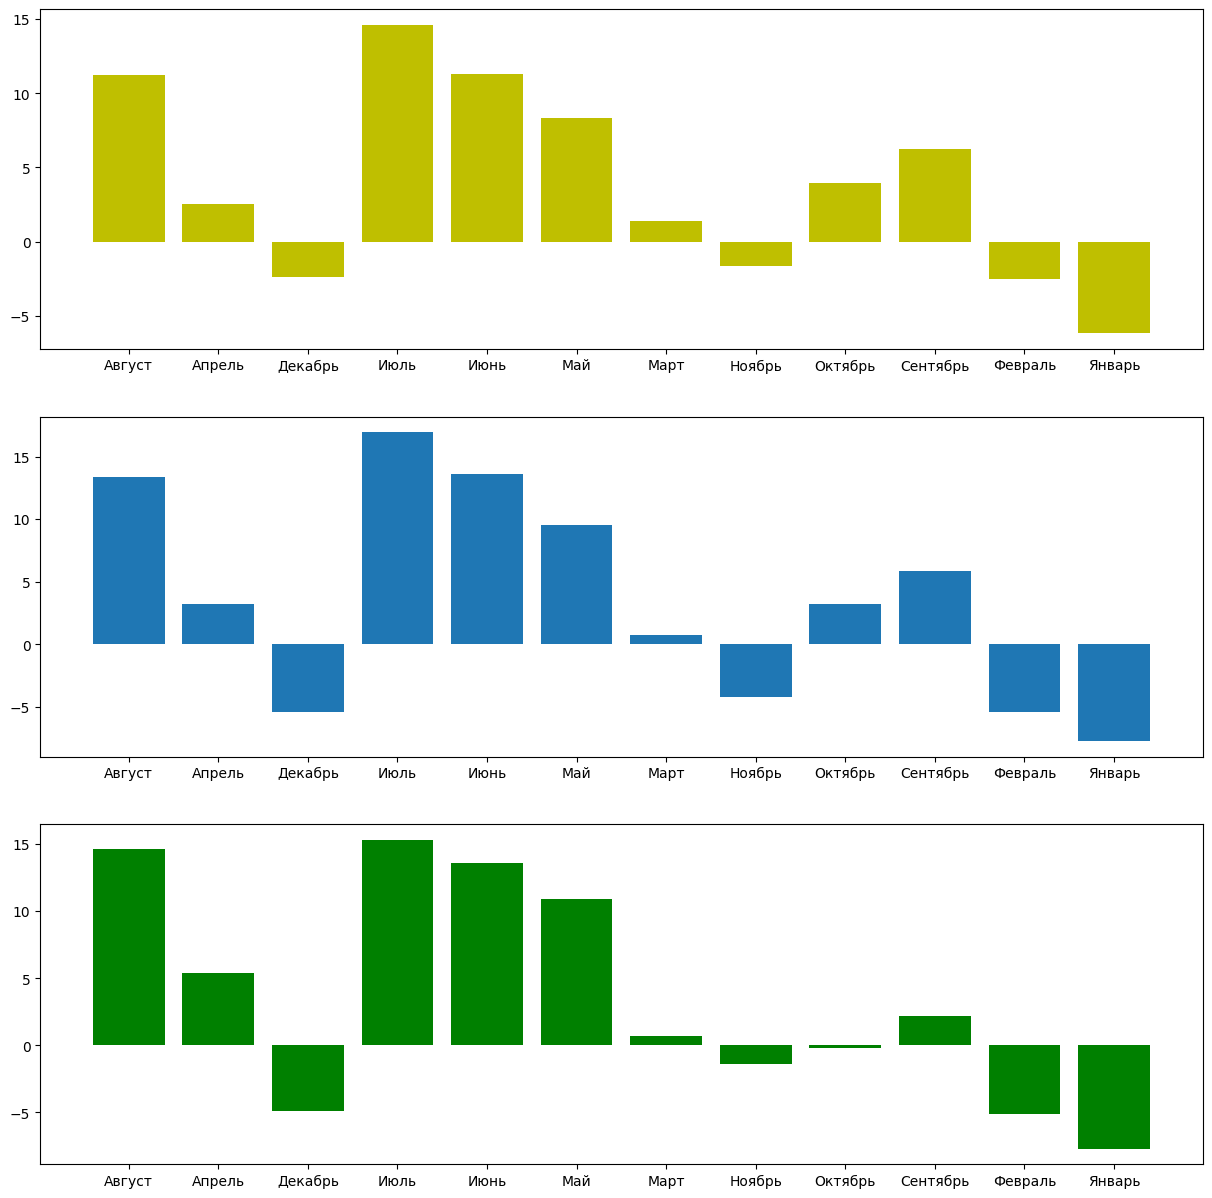

In [70]:

fig, (ax1,ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (15,15))

ax1.bar(month_temp_group['Month'], month_temp_group['Mean'], color = 'y')
ax2.bar(month_temp_group['Month'], month_temp_group['Median'])
ax3.bar(month_temp_group['Month'], month_temp_group['Mode'], color = 'g')

plt.show()

### 1.6

In [74]:
month_pressure_group = df.groupby('month')['pressure'].agg([np.mean,np.median, lambda i: stats.mode(i, axis=None,keepdims=False)[0]])
month_pressure_group = month_pressure_group.reset_index(level='month')
month_pressure_group.rename(columns = {'month' :  'Month', 'mean' : 'Mean', 'median' : 'Median', '<lambda_0>' : 'Mode'},inplace = True)

print(month_pressure_group)


       Month        Mean  Median   Mode
0     Август  761.472984  761.90  763.0
1     Апрель  762.376250  763.00  759.7
2    Декабрь  763.216532  764.60  758.5
3       Июль  757.202419  756.30  755.2
4       Июнь  759.383682  758.40  756.4
5        Май  761.002016  760.30  760.2
6       Март  761.793117  762.70  758.4
7     Ноябрь  770.042083  770.75  767.0
8    Октябрь  761.418548  762.30  762.7
9   Сентябрь  759.481667  760.20  762.6
10   Февраль  757.710268  758.20  755.8
11    Январь  761.921774  761.00  756.4


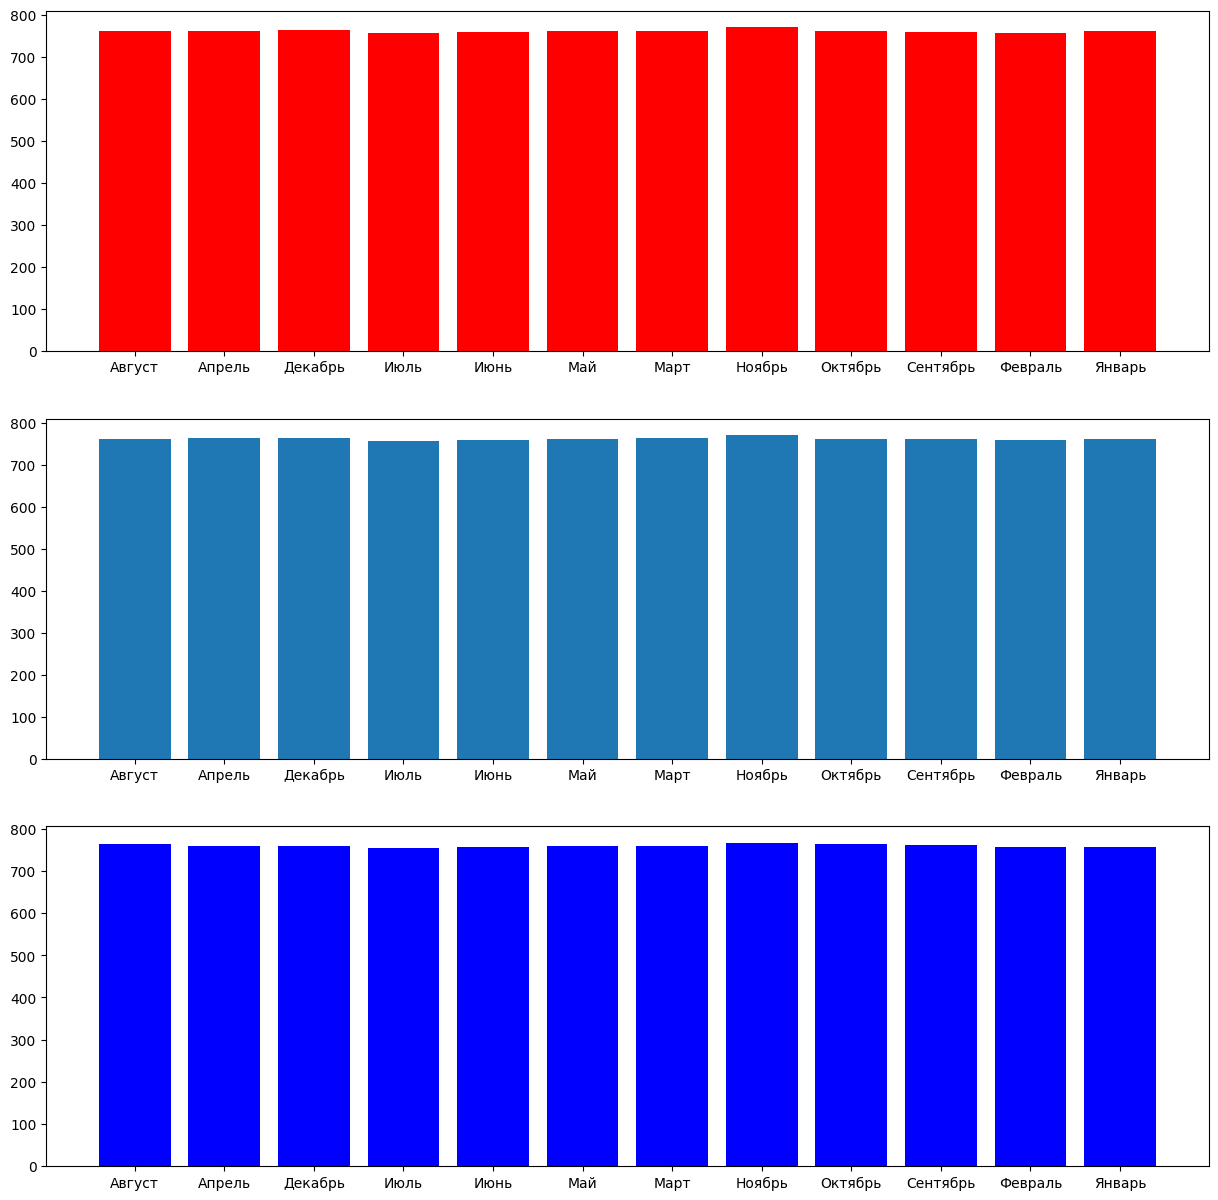

In [75]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (15,15))

ax1.bar(month_pressure_group['Month'], month_pressure_group['Mean'], color = 'r')
ax2.bar(month_pressure_group['Month'], month_pressure_group['Median'])
ax3.bar(month_pressure_group['Month'], month_pressure_group['Mode'], color = 'b')

plt.show()

### 1.7

In [76]:
month_humidity_group = df.groupby('month')['pressure'].agg([np.mean,np.median, lambda i: stats.mode(i, axis=None,keepdims=False)[0]])
month_humidity_group = month_humidity_group.reset_index(level='month')
month_humidity_group.rename(columns = {'month' :  'Month', 'mean' : 'Mean', 'median' : 'Median', '<lambda_0>' : 'Mode'},inplace = True)

print(month_humidity_group)

       Month        Mean  Median   Mode
0     Август  761.472984  761.90  763.0
1     Апрель  762.376250  763.00  759.7
2    Декабрь  763.216532  764.60  758.5
3       Июль  757.202419  756.30  755.2
4       Июнь  759.383682  758.40  756.4
5        Май  761.002016  760.30  760.2
6       Март  761.793117  762.70  758.4
7     Ноябрь  770.042083  770.75  767.0
8    Октябрь  761.418548  762.30  762.7
9   Сентябрь  759.481667  760.20  762.6
10   Февраль  757.710268  758.20  755.8
11    Январь  761.921774  761.00  756.4


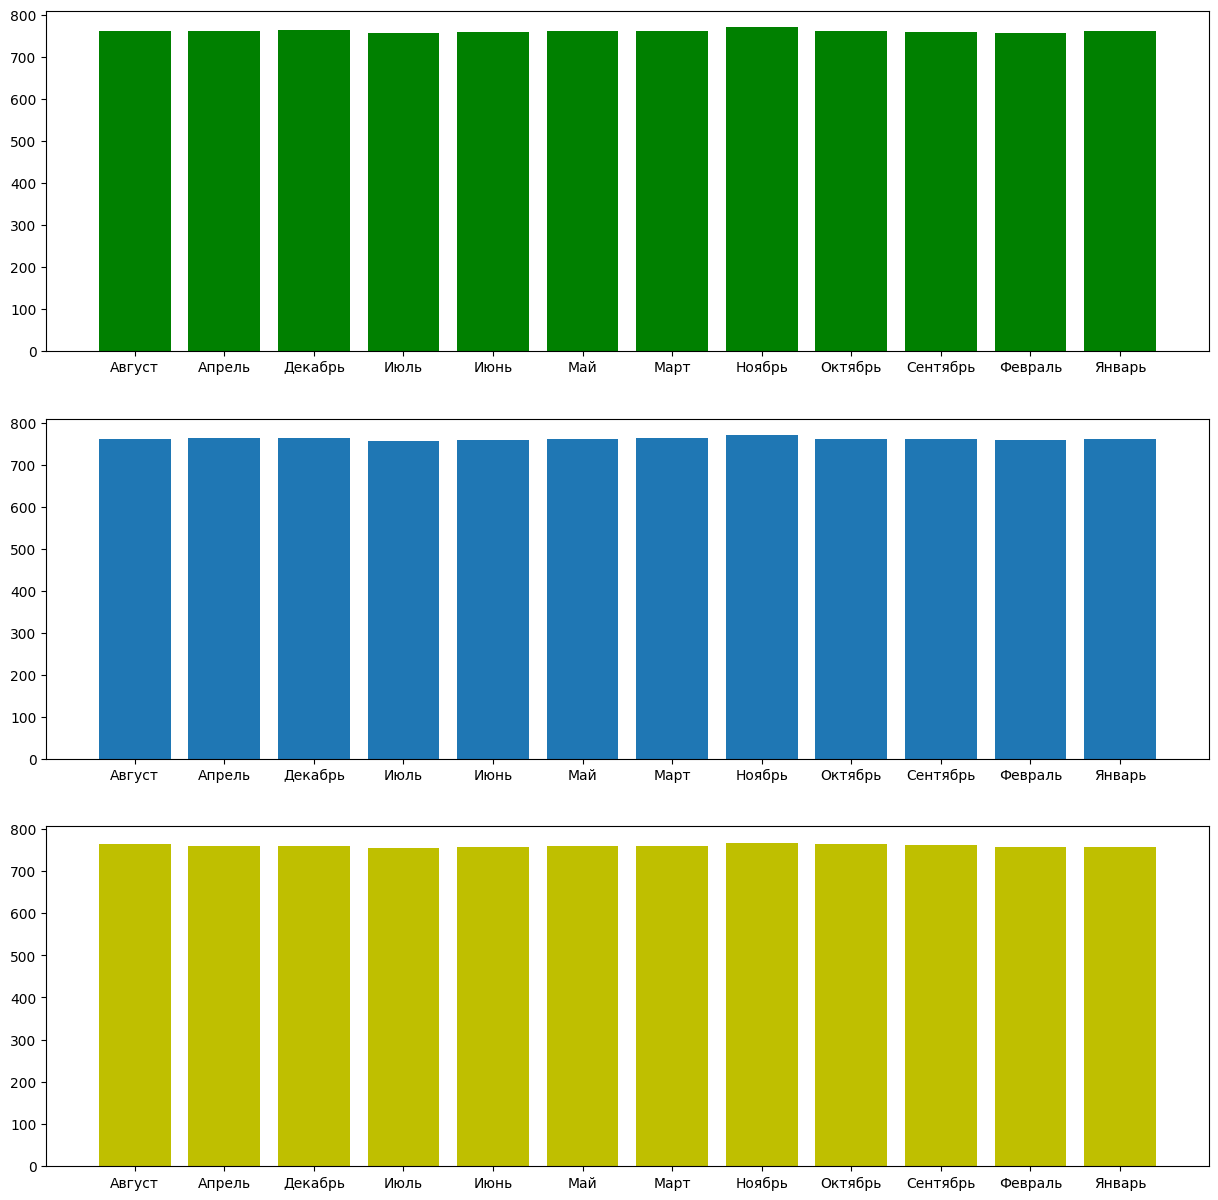

In [83]:
fig, (ax1,ax2, ax3) = plt.subplots(nrows = 3, ncols = 1, figsize = (15,15))

ax1.bar(month_humidity_group['Month'], month_humidity_group['Mean'], color = 'g')
ax2.bar(month_humidity_group['Month'], month_humidity_group['Median'])
ax3.bar(month_humidity_group['Month'], month_humidity_group['Mode'], color = 'y')

plt.show()